# Modelo matemático y computacional para predecir el comportamiento de la Covid-19

## Distanciamiento social como estrategia para ralentizar la propagación

#### Elaborado por: 

***Carlos Alberto Álvarez Henao, I.C. DS.C*** ([carlosalvarezh@gmail.com](mailto:carlosalvarezh@gmail.com))

Abril 15, 2020 - Medellín, Colombia

***Nota:*** basado en los artículos publicados en:

- [Social Distancing to Slow the Coronavirus -  Modeling the flattening of the COVID-19 peaks](https://towardsdatascience.com/social-distancing-to-slow-the-coronavirus-768292f04296 "Towardsdatascience"): By Christian Hubbs, in Towardsdatascience.com, Mar 12, 2020


- [Why outbreaks like coronavirus spread exponentially, and how to “flatten the curve”](https://www.washingtonpost.com/graphics/2020/world/corona-simulator/): By Harry Stevens, in The Washington Post, Mar 14, 2020


- [Prevendo o crescimento de casos de COVID-19 (coronavírus) no Brasil com análise de dados, gráficos e equações! — Partes 1 e 2](https://medium.com/@caiquecoelho/prevendo-o-crescimento-de-casos-de-covid-19-coronavirus-no-brasil-com-an%C3%A1lise-de-dados-gr%C3%A1ficos-33ee525b62f8): By Caíque Coelho, in Towardsdatascience.com. Mar 19


- [Infectious Disease Modelling: Understanding the models that are used to model Coronavirus](https://towardsdatascience.com/infectious-disease-modelling-part-i-understanding-sir-28d60e29fdfc): By Henri Froese, in Towardsdatascience.com, Apr 06,2020


- [Infectious Disease Modelling: Beyond the Basic SIR Model](https://towardsdatascience.com/infectious-disease-modelling-part-i-understanding-sir-28d60e29fdfc): By Henri Froese, in Towardsdatascience.com, Apr 11,2020 

# Contextualización

Como es de ámplio conocimiento de todos hoy en día, la Covid-19 ha crecido rápidamente en todo el mundo. La gran mayoría de paises han tomado medidas drásticas frente a la movilidad de sus ciudadanos. Estas medidas se toman con la intención de retrasar la propagación (no detenerla) de la enfermedad. Este tipo de estrategia se denomina *Distanciamiento Social*.

La idea detrás de esta política de salud pública es reducir el contacto *persona-a-persona* para que sea menos probable la propagación de la enfermedad y la capacidad de los sistemas de salud local no se saturen, ayudando a garantizar la adecuada atención a la población enferma y disminyendo la cantidad de decesos. Los efectos de una política en este sentido se pueden observar en la siguiente gráfica.

![Aplanar la curva](https://miro.medium.com/max/700/1*pVVK99mWB21izaNiDVlgOg.gif)

# Distanciamiento social - Definición

“Conjunto de medidas no farmacéuticas de control de infecciones, con el objetivo de detener o desacelerar la propagación de una enfermedad contagiosa.” 

<p float="center">
  <img src=https://upload.wikimedia.org/wikipedia/commons/6/66/Social_distancing_queueing_for_the_supermarket_J._Sainsbury%27s_north_London_Coronavirus_Covid_19_pandemic_-_30_March_2020.jpg width="750" />
</p>

<p float="center">
  <img src=https://upload.wikimedia.org/wikipedia/commons/f/fd/03.05_%E7%B8%BD%E7%B5%B1%E6%8E%A5%E8%A6%8B%E7%BE%8E%E5%9C%8B%E5%9C%A8%E8%87%BA%E5%8D%94%E6%9C%83%28AIT%29%E4%B8%BB%E5%B8%AD%E8%8E%AB%E5%81%A5.jpg width="250" />
</p>

<p float="left">
  <img src=https://github.com/carlosalvarezh/Covid-19-SEIRD/blob/master/DistSocial03.png?raw=true width="1000" /> 
</p>

# Distanciamiento social - Definición

***Levítico, 13:46:*** 

<font size=1 color="black" face="arial">
<h1 align="center">“Todo el tiempo que la llaga estuviere en él, será inmundo; estará impuro, y habitará solo; fuera del campamento será su morada.”</h1>
</font>




Se han establecido colonias de leprosos y lazaretos como medios para impedir la transmisión de la lepra y otras enfermedades infecciosas.

***Lazareto - Ancona, Italia, 1700's***

<p float="center">
  <img src=https://upload.wikimedia.org/wikipedia/commons/6/6d/Mole2.JPG width="500" />
</p>

***Agua de Dios, Colombia, 1870's***
<p float="center">
  <img src=https://upload.wikimedia.org/wikipedia/commons/thumb/3/39/Colombia_-_Cundinamarca_-_Agua_de_Dios.svg/800px-Colombia_-_Cundinamarca_-_Agua_de_Dios.svg.png width="500" />
</p>

# Simulación física de dispersión de gotículas


Veamos primer una serie de simulaciones computacionales de la dispersión de partículas producto de la tos humana empleando técnicas de la [CFD](https://en.wikipedia.org/wiki/Computational_fluid_dynamics "CFD") (Dinámica de Fluidos Computaconal) y empleando un software comercial

In [1]:
from IPython.display import IFrame

URL = 'https://www.ansys.com/about-ansys/covid-19-simulation-insights'
IFrame(src = URL, width = 980, height = 500)

# Modelos matemáticos

Los modelos matemáticos son aproximaciones, bien sustentadas y justificadas, de la realidad y en este contexto intentan brindar elementos a la toma de decisiones de políticas públicas para intentan aplanar la curva de propagación de la enfermedad.

In [2]:
URL = 'https://www.washingtonpost.com/graphics/2020/world/corona-simulator-spanish/'
IFrame(src = URL, width = 980, height = 600)

# S.I.R

una estrategia empleada para modelar enfermedades contagiosas, que pueden propagarse entre los miembros de una población, es el modelo comportamental. Este tipo de modelo separa una población en diferentes comportamientos. La idea es obtener informacion acerca de qué tan rápido sucede dicha propagación, qué proporción de la población se infecta, qué proporción moriría, etc. Diferentes comportamientos se pueden indicar como (modelo básico):

- **S**usceptible (aún puede estar infectado, "sano")


- **I**nfectado


- **R**ecuperado (ha sido infectado y no puede volver a infectarse)

Para definir las variables involucradas en este simple modelo veamos el siguiente ejemplo.

## Ejemplo

Supóngase que se tiene una población de $1000$ habitantes ($N=1000$) y se sabe que $400$ de ellas se han infectado en un tiempo, $t$, de $7$ días después del brote de la epidemia. Lo anterior se puede denotar como $S(7)=400$. En esta nueva enfermedad, la probabilidad de que una persona infectada infecte a una persona sana es del $20\%$, y supongamos que el número promedio de personas con las que una persona está en contacto por día es de $5$. Entonces, por día, un individuo infectado se encuentra con $5$ personas resultando infectadas el $20\%$ de ellas, es decir, la persona enferma infectará a $1$ persona por día. Se denota a esto con el parámetro $\beta$, que es la cantidad esperada de personas que una persona infectada infecta por día.

Sea $D$ la cantidad de días que una persona infectada tiene y puede transmitir la enfermedad, este dato es extremadamente importante. Si $D = 7$, una persona infectada camina durante siete días propagando la enfermedad e infecta a $1$ persona por día ($\beta = 1$). Entonces, esperamos que una persona infectada infecte a $7$ personas más. Este es el número de reproducción básico, $R_0$, que representa el número total de personas que infecta una persona infectada, es decir, $R_0=\beta \times D$.

Si se piensa en $D$ como el número de días que una persona infectada tiene la enfermedad, entonces se puede pensar en otro parámetro $\gamma$, como la tasa de recuperación, o la proporción de infectados que se recuperan por día. Por ejemplo, si se tienen actualmente $30$ personas infectadas y $D=3$ (por lo que están infectadas durante tres días), entonces, por día $1/3$ de ellas se recuperarán ($10$ personas), es decir, $\gamma=1/3$. Siendo $\gamma=1/D$, entonces $D=1/\gamma$ y $R_0=\beta \times D$, se deduce que $R_0=\beta / \gamma$.

Resumiendo, las variables involucradas en el ejemplo anterior son:

- $N$: Total de la población


- $S(t)$: Número de personas susceptibles de ser infectadas en un día $t$


- $I(t)$: Número de personas infectadas en un día $t$


- $R(t)$: Número de personas recuperadas en un día $t$



- $\beta$: Cantidad esperada de personas que una persona infectada infecta por día


- $D$: Número de días que una persona infectada tiene y puede transmitir la enfermedad


- $\gamma$: Proporción de infectados recuperados por día ($\gamma = 1/D$)



- $R_0$: Número total de personas infectadas por una persona infectada ($R_0=\beta / \gamma$)




# Derivación de las ecuaciones

Deseamos determinar el número de *infectados*, *susceptibles* y *recuperados* para todos los días, dados únicamente los parámetros $\gamma$, $\beta$ y $N$. Es difícil obtener una fórmula directa para $S(t)$, $I(t)$ y $R(t)$, sin embargo, es muy simple describir el cambio por día de $S$, $I$ y $R$, es decir, como cambia el número de *susceptibles* / *infectados* / *recuperados* dependiendo de los actuales valores.

Ahora estamos en el día $t$ después del brote de la enfermedad. Aún así, la cantidad esperada de personas que una persona infectada infecta por día es $1$ ($\beta = 1$) y el número de días que una persona infectada tiene y puede transmitir la enfermedad es $7$ ($\gamma =1/7$ y $D=7$).

Digamos que en el día $t$, $60$ personas están infectadas, $I (t) = 60$, la población total es $100$, $N = 100$, y $30$ personas aún son susceptibles, $S(t) = 30$ y $R( t) = 100–60–30 = 10$. Ahora, ¿cómo cambian $S(t)$, $I(t)$ y $R(t)$ al día siguiente?

Se tienen $60$ personas infectadas. Cada uno de ellos infecta a $\beta = 1$ persona por día. Sin embargo, solo $30/100 = 30\%$ de las personas conocidas todavía son susceptibles y pueden infectarse (eso es $S(t) / N$). Entonces, infectan a $60 \times 1 \times 30/100 = 18$ personas (de nuevo, piensen en ello hasta que tenga sentido: $60$ infectados que infectan en promedio $1$ persona por día, pero solo $30$ de $100$ personas aún pueden estar infectadas, por lo que no infecte a $60 \times 1$ personas, sino que solo a $60 \times 1 \times 30 / 100 = 18$ personas). Entonces, $18$ personas de los susceptibles se infectan, por lo que $S(t)$ cambia en menos $18$. Al conectar las variables, acabamos de derivar la primera fórmula:

$$\text{cambio de } S(t) \text{ al día siguiente } = -\beta \cdot I(t) \cdot S(t) / N$$

Lo anterior es la expresión de la deriva, $S'(t) = dS/dt$, y reescribiendo

$$S'(t) = dS(t)/dt = -\beta \cdot I(t) \cdot S(t) / N$$

Ahora, ¿cómo cambia la cantidad de infectados? hay algunas personas nuevas infectadas. Exactamente la cantidad de personas que "*salen*" de $S(t)$ "*llegan*" a $I(t)$. Entonces, tenemos $18$ nuevos infectados y ya sabemos que la fórmula será similar a esta: $I'(t)= + β \times I(t) \times S(t)/N$ (se gana la cantidad exacta que $S(t)$ pierde, por lo que simplementese cambia el signo). Solo falta una cosa: algunas personas se recuperan. Recuerde, tenemos $\gamma$ para eso, es la proporción de infectados que se recuperan por día, ¡eso es justo lo que necesitamos!

Tenemos $60$ infectados y $\gamma = 1/3$, por lo que un tercio de los $60$ se recupera. Eso es $1/3 \times 60 = 20$. Finalmente, obtenemos la fórmula:

$$I'(t) = dI(t)/dt = \beta \cdot I(t) \cdot S(t) / N - \gamma \cdot I(t)$$

El primer término del lado derecho de la ecuación es el recién infectado de los susceptibles. La segunda parte son las recuperaciones.

Finalmente, llegamos a la última fórmula, el cambio en las recuperaciones. Los recién recuperados son exactamente los $20$ que acabamos de calcular; no hay personas saliendo del compartimento "*recuperado*". Se asume que una vez recuperados, permanecen inmunes:

$$R'(t) = dR(t)/dt = \gamma \cdot I(t)$$

Ya contamos con las fórmulas que se buscaban:

$$
\begin{align}
\frac{dS}{dt} & = -\beta \cdot I \cdot \frac{S}{N} \\
\frac{dI}{dt} & = \beta \cdot I \cdot \frac{S}{N} - \gamma \cdot I \\
\frac{dR}{dt} & = \gamma \cdot I
\end{align}
$$

Este es un conjunto de Ecuaciones Diferenciales Ordinarias (ODEs).

Ahora podemos describir el cambio en el número de personas *susceptibles*, *infectadas* y *recuperadas*. A partir de estas fórmulas, afortunadamente, podemos calcular los números que realmente nos interesan: $S(t)$, $I(t)$ y $R(t)$, el número de personas *susceptibles*, *infectadas* y *recuperadas* por cada día $t$.

# Codificando el modelo

Ahora vamos a codificar las ecuaciones. Se emplearán los códigos implementados en [Infectious Disease Modelling: Understanding the models that are used to model Coronavirus](https://towardsdatascience.com/infectious-disease-modelling-part-i-understanding-sir-28d60e29fdfc): By Henri Froese, in Towardsdatascience.com, Apr 06, 2020. El código completo lo pueden descargar de [su sitio en GitHub](https://github.com/hf2000510/infectious_disease_modelling).

Inicialmente se definiran los parámetros $N$, $\beta$, $D$, $\gamma$, y las condiciones iniciales, en $t=0$, para $S(t)$, $I(t)$ y  $R_0(t)$. 

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [4]:
N = 1000
beta = 1.0  # infected person infects 1 other person per day
D = 4.0 # infections lasts four days
gamma = 1.0 / D

S0, I0, R0 = 999, 1, 0  # initial conditions: one infected, rest susceptible

Ahora se implementarán las fórmulas determinadas

In [5]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

Ahora aquí es donde ocurre la magia: obtenemos nuestros valores $S(t)$, $I(t)$ y $R(t)$ de la función `odeint` de `Python` que toma las fórmulas que definimos anteriormente, las condiciones iniciales y nuestras variables $N$, $\beta$ y $\gamma$, y calcula $S$, $I$ y $R$ para cada uno de los siguientes $50$ días.

In [6]:
t = np.linspace(0, 50, 50) # Grid of time points (in days)
y0 = S0, I0, R0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

In [7]:
def plotsir(t, S, I, R):
    f, ax = plt.subplots(1,1,figsize=(10,4))
    ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
    ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')
    ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
    
    ax.set_xlabel('Time (days)')
    
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.show();
    

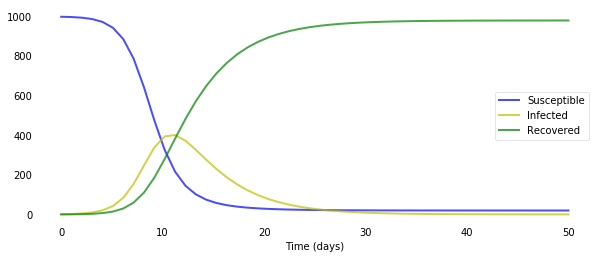

In [8]:
plotsir(t, S, I, R)

Como puede ver, solo toma alrededor de $30$ días para que casi una población completa de $1000$ personas se infecte. Por supuesto, la enfermedad modelada aquí tiene un valor $R_0$ muy alto de $4.0$. Simplemente cambiando el número de personas que una persona infectada infecta por día $\beta$ a $0.5$ resulta en un escenario completamente diferente:

In [9]:
N = 1000
beta = 0.50  # infected person infects 1 other person per day
D = 4.0 # infections lasts four days
gamma = 1.0 / D

S0, I0, R0 = 999, 1, 0  # initial conditions: one infected, rest susceptible

In [10]:
t = np.linspace(0, 50, 50) # Grid of time points (in days)
y0 = S0, I0, R0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

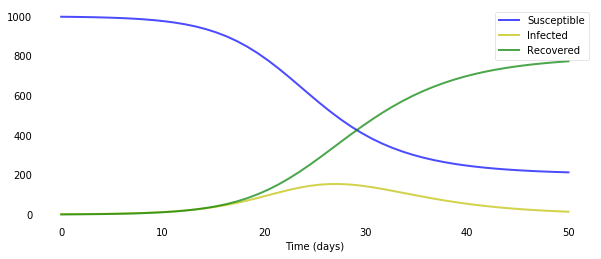

In [11]:
plotsir(t, S, I, R)

Como puede ver, estos sistemas de EDO son extremadamente sensibles a los parámetros iniciales. Esa es también la razón por la cual es tan difícil modelar correctamente un brote emergente de una nueva enfermedad: simplemente no sabemos cuáles son los parámetros, e incluso los cambios leves producen resultados muy diferentes.

# Conclusiones

El modelo S.I.R. es un modelo simple de la manera como se puede transmitir una enfermedad contagiosa en un grupo de personas, sin embargo, como todo modelo, aunque se trata de describir la realidad, son más las inquietudes que resultan que las respuestas que ofrece. Todo dependerá de los parámetros que se tienen en cuenta y la calidad de la información, datos, con que se cuente.

# *S.E.I.R*


En la literatura existen otros modelos más completos, y complejos, como el SEIR, que es una extensión del S.I.R. y que considera, además de los parámetros vistos, otros como:

- Un estado "***Deceso***" que contempla las personas que fallecen debido a la enfermedad.


- Un estado "***Expuesto***" para individuos que han contraído la enfermedad pero que aún no son infecciosos (este es conocido como el modelo ***S.E.I.R.***)


- Valores de $R_0$ dependientes del tiempo que nos permitirán modelar cuarentenas, bloqueos, ...


- Tasas de mortalidad dependientes de los recursos y la edad que nos permitirán modelar hospitales superpoblados, poblaciones con muchos jóvenes, ...


entre muchos otros posibles parámetros adicionales, que podrían complementar el modelo, pero lo harían mucho más complejo.

Al derivar las ecuaciones, ya las consideramos intuitivamente como "*instrucciones*" que nos dicen lo que le sucede a la población al día siguiente (por ejemplo, cuando $10$ personas están infectadas y la recuperación se produce a un ritmo de $\gamma = 1/5$, entonces el número de individuos recuperados al día siguiente debería aumentar en $1/5 \times 10 = 2$). Ahora solidificamos esta comprensión de las ecuaciones como "*direcciones*" o "*transiciones*" de un compartimento $S$, $I$ o $R$ a otro; esto simplificará enormemente las cosas cuando introduzcamos más compartimentos más adelante y las ecuaciones se vuelvan confusas.

## Definiciones

Los *compartimientos* son cajas, que denotan "*estados*", como este:

<p float="center">
  <img src=https://miro.medium.com/max/275/1*hJPP0FLd-92bV16JPU0_-g.png width="250" />
</p>

Las *transiciones* de un compartimento a otro se representan mediante flechas, con el siguiente etiquetado:

<p float="center">
  <img src=https://miro.medium.com/max/920/1*5caEXgP-6ZG7HkrPECKAEA.png width="500" />
</p>

La *tasa* describe cuánto tiempo dura la transición, la *población* es el grupo de individuos a los que se aplica esta transición, y la *probabilidad* es la probabilidad de que la transición tenga lugar para un individuo.

### Ejemplo

Supongamos la transición de *Susceptibles* a *Infectados* en las ecuaciones $S.I.R.$, con $\beta=2$, una población total de $100$, $10$ infectados y $90$ susceptibles. La tasa es $1$, ya que las infecciones ocurren de inmediato; la población a la que se aplica la transición es $2 \times 10 = 20$ individuos, ya que los $10$ infectados infectan a $2$ personas; la probabilidad es del $90\%$, ya que $90/100$ personas aún pueden estar infectadas. Corresponde a esta notación intuitiva:

<p float="center">
  <img src=https://miro.medium.com/max/1222/1*We4K9njCiEMowVuran4mWA.png width="350" />
</p>


De forma más general, para todo el modelo (para $I \rightarrow R$, la *tasa* es $\gamma$ y la probabilidad es $1$ a medida que todos se recuperarán)

<p float="center">
  <img src=https://miro.medium.com/max/1400/1*NNO-CdlCZORoPYtllW343A.png width="750" />
</p>

Como puede verse, las flechas que apuntan hacia un compartimento se agregan en la ecuación; las flechas que apuntan lejos de un compartimento se restan. Es una forma gráfica de presentar las ecuaciones determinadas arriba.

$$
\begin{align}
\frac{dS}{dt} & = -\beta \cdot I \cdot \frac{S}{N} \\
\frac{dI}{dt} & = \beta \cdot I \cdot \frac{S}{N} - \gamma \cdot I \\
\frac{dR}{dt} & = \gamma \cdot I
\end{align}
$$

Aunque ya tengamos un mejor entendimiento del modelo $S.I.R.$, e incluso se haya codificado en un lenguaje de programación como `python`, los resultados obtenidos no representan muy bien la realidad, y por ahora no deja de ser un simple "juguete" interesante. 

Vamos a tratar de "mejorar" este modelo básico incluyendo otros "compartimientos"

# Introduciendo nuevos Compartimientos

## Obteniendo el compartimiento de *Expuestos*

Muchas enfermedades infecciosas tienen un período de incubación antes de ser infecciosas durante el cual el huésped aún no puede transmitir la enfermedad. Llamaremos a tales individuos, y a todo el compartimento, *expuestos*.

Intuitivamente, tendremos transiciones de la forma $S \rightarrow E \rightarrow I \rightarrow R$: las personas susceptibles pueden contraer el virus y así quedar expuestos, luego infectados y luego recuperados. La nueva transición $S \rightarrow E$ tendrá la misma flecha que la transición $S \rightarrow I$ actual, ya que la probabilidad es la misma (todos los *susceptibles* pueden estar *expuestos*), la tasa es la misma ("*exposición*" ocurre inmediatamente) y la población es igual (los individuos infecciosos pueden propagar la enfermedad y cada uno expone a $\beta$ nuevos individuos por día). Tampoco hay razón para que la transición de $I$ a $R$ cambie. La única nueva transición es la de $E$ a $I$: la probabilidad es $1$ (todos los que están expuestos se infectan), la población es $E$ (todos los expuestos se infectarán) y la tasa obtiene una nueva variable, $\delta$(delta). Llegamos a estas transiciones:

<p float="left">
  <img src=https://miro.medium.com/max/1400/1*B-HZLpVWEgAZ3iloHBJjCA.png width="750" />
</p>



De estas transiciones, podemos derivar inmediatamente las nuevas ecuaciones:

$$
\begin{align}
\frac{dS}{dt} & = -\beta \cdot I \cdot \frac{S}{N} \\
\frac{dE}{dt} & = \beta \cdot I \cdot \frac{S}{N} - \delta \cdot E\\
\frac{dI}{dt} & = \delta \cdot E - \gamma \cdot I \\
\frac{dR}{dt} & = \gamma \cdot I
\end{align}
$$

## Programando el compartimiento de *Expuestos*

Retomando el código realizado antes y cambiando algunas líneas para adicionarle los nuevos compartimientos. Como ejemplo se modelará una enfermedad altamente infecciosa, $R_0=5.0$ en una población de $1$ millón, con un periodo de incubación de $5$ días y una recuperación de $7$ días.

In [12]:
def plotsir(t, S, E, I, R):
    f, ax = plt.subplots(1,1,figsize=(10,4))
    ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
    ax.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Expuesto')
    ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infectado')
    ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recuperado')
    
    ax.set_xlabel('Tiempo (dias)')
    ax.set_ylabel('Población (habitantes)')
    
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.show();

Función para determinar las derivadas de las funciones

In [13]:
def deriv(y, t, N, beta, gamma, delta):
    S, E, I, R = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - delta * E
    dIdt = delta * E - gamma * I
    dRdt = gamma * I
    return dSdt, dEdt, dIdt, dRdt

Determinación de los valores iniciales

In [14]:
N = 1000000
D = 4.0 # infections lasts four days
gamma = 1.0 / D
delta = 1.0 / 5.0  # incubation period of three days
R_0 = 5.0
beta = R_0 * gamma # infected person infects 1 other person per day

S0, E0, I0, R0 = N-1, 1, 0, 0  # initial conditions: one exposed

Cálculo de $S,E,I$ y $R$ para todo el tiempo de simulación (100 días)

In [15]:
t = np.linspace(0, 100, 100) # Grid of time points (in days)
y0 = S0, E0, I0, R0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta))
S, E, I, R = ret.T

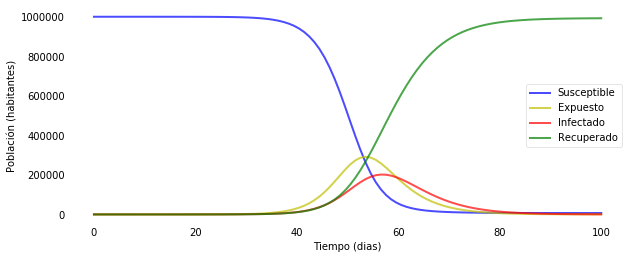

In [16]:
plotsir(t, S, E, I, R)

Cada vez tiene mejor cara... pero aún falta lo más cruel de todo, representar los posibles decesos. 

## Obteniendo el compartimiento de "*Decesos*"

Recordemos el modelo $S.E.I.R.$

<p float="left">
  <img src=https://miro.medium.com/max/1000/1*B-HZLpVWEgAZ3iloHBJjCA.png width="500" />
</p>

¿Cuándo puede morir una persona por la enfermedad? ¡Sólo mientras esté infectado!, esto significa que hay qué agregar una transición $I \rightarrow D$. 


Por supuesto, las personas no mueren de inmediato; Definimos una nueva variable $\rho$(rho) para la tasa a la que las personas mueren (por ejemplo, cuando tarda $6$ días en morir, $\rho=1/6$). No hay razón para que la tasa de recuperación, $\gamma$, cambie. Entonces, nuestro nuevo modelo se verá:

<p float="left">
  <img src=https://miro.medium.com/max/1400/1*67WEZSCZ70oMs5TKKvvfJg.png width="500" />
</p>

Lo único que falta son las probabilidades de pasar de infectado a recuperado y de infectado a muerto. Esa será una variable más (¡la última por ahora!), La tasa de mortalidad $\alpha$. Por ejemplo, si $\alpha= 5\%$, $\rho = 1$ y $\gamma=1$ (por lo que las personas mueren o se recuperan en $1$ día, eso es un ejemplo más fácil) y $100$ personas están infectadas, entonces $5\% \times 100 = 5$ personas morirán. Eso deja $95\% \times 100 = 95$ personas en recuperación. En resumen, la probabilidad de $I \rightarrow D$ es $\alpha$ y, por lo tanto, la probabilidad de $I \rightarrow R$ es $1-\alpha$. Finalmente llegamos a este modelo:

<p float="left">
  <img src=https://miro.medium.com/max/1400/1*TIZaRpt70TR1RFtf2dmlew.png width="500" />
</p>

Adicionando esta nueva ecuación al conjunto que teníamos de antes:

$$
\begin{align}
\frac{dS}{dt} & = -\beta \cdot I \cdot \frac{S}{N} \\
\frac{dE}{dt} & = \beta \cdot I \cdot \frac{S}{N} - \delta \cdot E\\
\frac{dI}{dt} & = \delta \cdot E - (1-\alpha) \cdot \gamma \cdot I - \alpha \cdot \rho \cdot I\\
\frac{dR}{dt} & = (1-\alpha) \cdot \gamma \cdot I \\
\frac{dD}{dt} & = \alpha \cdot \rho \cdot I
\end{align}
$$

## Programando el compartimiento de *Decesos*

Modificando el código que venimos trayendo para incluir los decesos. Solo es necesario realizar algunos cambios menores, como es incluir $\alpha=20\%$ y $\rho=1/9$:

In [17]:
def deriv(y, t, N, beta, gamma, delta, alpha, rho):
    S, E, I, R, D = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - delta * E
    dIdt = delta * E - (1 - alpha) * gamma * I - alpha * rho * I
    dRdt = (1 - alpha) * gamma * I
    dDdt = alpha * rho * I
    return dSdt, dEdt, dIdt, dRdt, dDdt

In [18]:
D = 4.0 # infections lasts four days
gamma = 1.0 / D
delta = 1.0 / 5.0  # incubation period of five days
R_0 = 5.0
beta = R_0 * gamma  # R_0 = beta / gamma, so beta = R_0 * gamma
alpha = 0.2  # 10% death rate
rho = 1/9  # 9 days from infection until death
S0, E0, I0, R0, D0 = N-1, 1, 0, 0, 0  # initial conditions: one exposed

In [19]:
t = np.linspace(0, 100, 100) # Grid of time points (in days)
y0 = S0, E0, I0, R0, D0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta, alpha, rho))
S, E, I, R, D = ret.T

In [20]:
def plotseird(t, S, E, I, R, D):
    f, ax = plt.subplots(1,1,figsize=(10,4))
    ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
    ax.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Exposed')
    ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
    ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
    ax.plot(t, D, 'k', alpha=0.7, linewidth=2, label='Dead')
    ax.plot(t, S+E+I+R+D, 'c--', alpha=0.7, linewidth=2, label='Total')

    ax.set_xlabel('Time (days)')

    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.show();

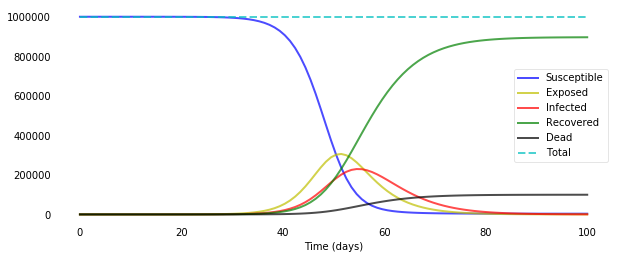

In [21]:
plotseird(t, S, E, I, R, D)

Se adicionó una variable "*total*" que suma $S, E, I, R$ y $D$ para cada paso de tiempo como un "*control de sanidad*": los compartimentos siempre tienen que sumar $N$; Esto puede dar una pista sobre si las ecuaciones son correctas.

Ya sabemos cómo ir agregando nuevos compartimentos al modelo: piense qué transiciones deben agregarse y cambiarse; pensar en las probabilidades, poblaciones y tasas de estas nuevas transiciones; dibuja el diagrama; y finalmente escribe las ecuaciones. ¡La codificación definitivamente no es la parte difícil para estos modelos!

Por ejemplo, es posible que desee agregar un compartimento "*UCI*" para las personas infectadas que necesitan ir a una *UCI* (lo haremos en el próximo artículo). Piense desde qué compartimiento las personas pueden ir a la *UCI*, a dónde pueden ir después de la *UCI*, etc.

# Variables dependientes del tiempo

Resumamos el listado de las variables empleadas hasta ahora:

- $N$: población total


- $S(t)$: número de personas susceptibles en el día $t$


- $E(t)$: número de personas expuestas el día $t$


- $I(t)$: número de personas infectadas el día $t$


- $R(t)$: número de personas recuperadas el día $t$


- $D(t)$: número de personas fallecidas el día $t$


- $\beta$: cantidad esperada de personas que una persona infectada infecta por día


- $D$: número de días que una persona infectada tiene y puede transmitir la enfermedad


- $\gamma$: la proporción de infectados que se recuperan por día ($\gamma = 1/D$)


- $R_0$: el número total de personas que infecta una persona infectada ($R_0= \beta / \gamma$)


- $\delta$: duración del período de incubación


- $\alpha$: tasa de mortalidad


- $\rho$: tasa a la que muere la gente (= 1 / días desde la infección hasta la muerte)

Como puede ver, solo los compartimentos cambian con el tiempo (no son constantes). ¡Por supuesto, esto es muy poco realista! Como ejemplo, ¿por qué el valor $R_0$ debería ser constante? Seguramente, los bloqueos a nivel nacional reducen la cantidad de personas que infecta una persona infectada, ¡de eso se trata! Naturalmente, para acercarnos a modelar desarrollos del mundo real, tenemos que hacer que nuestras variables cambien con el tiempo.

# $R_0$ dependiente del tiempo

Primero, implementamos un cambio simple: en un día $L$, se aplica un estricto "*bloqueo*", empujando $R_0$ a $0.9$. En las ecuaciones, usamos $\beta$ β y no $R_0$, pero sabemos que $R_0=\beta / \gamma$, entonces $\beta = R_0 \cdot \gamma$. Eso significa que definimos una función

y otra función para $\beta$ que llama a dicha función

Ahora solo resta cambiar el código

In [22]:
def deriv(y, t, N, beta, gamma, delta, alpha, rho):
    S, E, I, R, D = y
    dSdt = -beta(t) * S * I / N
    dEdt = beta(t) * S * I / N - delta * E
    dIdt = delta * E - (1 - alpha) * gamma * I - alpha * rho * I
    dRdt = (1 - alpha) * gamma * I
    dDdt = alpha * rho * I
    return dSdt, dEdt, dIdt, dRdt, dDdt

In [23]:
N = 1000000
D = 4.0 # infections lasts four days
gamma = 1.0 / D
delta = 1.0 / 5.0  # incubation period of three days
L = 100

#R_0 = 5.0
def R_0(t):
    return 5.0 if t < L else 0.9

#beta = R_0 * gamma # infected person infects 1 other person per day
def beta(t):
    return R_0(t) * gamma

alpha = 0.2 #20% death rate
rho = 1/9 # 9 days from infection until death

S0, E0, I0, R0, D0 = N-1, 1, 0, 0, 0  # initial conditions: one exposed

In [57]:
t = np.linspace(0, 100, 100) # Grid of time points (in days)
n = len(t)
y0 = S0, E0, I0, R0, D0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta, alpha, rho))
S, E, I, R, D = ret.T

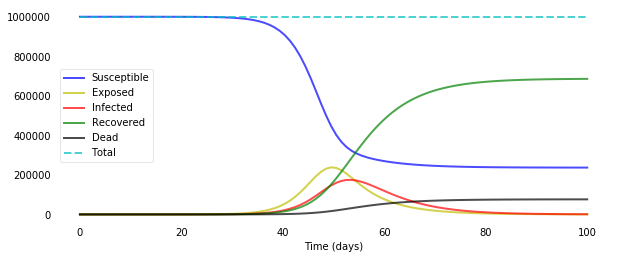

In [58]:
plotseird(t, S, E, I, R, D)

In [61]:
D[n-1]

76201.95041510701

En realidad, $R_0$ probablemente nunca "salta" de un valor a otro. Más bien, (más o menos rápidamente) cambia continuamente (y puede subir y bajar varias veces, por ejemplo, si se aflojan las medidas de distanciamiento social y luego se vuelven a ajustar). Puede elegir cualquier función que desee para $R_0$, pero una opción común para modelar el impacto inicial del distanciamiento social es una función [logística](https://en.wikipedia.org/wiki/Logistic_function).

La función (adoptada para estos propósitos) sería algo así como:

$$R_0(t)=\frac{R_{0_{start}}-R_{0_{end}}}{1+e^{-k(-x+x_0)}}+R_{0_{end}}$$

Y esto es lo que realmente hacen los parámetros:

- $R_{0_{start}}$ y $R_{0_{end}}$ son los valores de $R_0$ en el primer y el último día


- $x_0$ es el valor $x$ del punto de inflexión (es decir, la fecha de la disminución más pronunciada en $R_0$, esto podría considerarse como la fecha principal de "bloqueo")


- $k$ nos permite variar la rapidez con la que $R_0$ disminuye

Veamos antes como es el comportamiento de la curva logística para diferentes valores de $k=1.0, 0.5$ y $0.1$ y variando $R_0$ también entre un valor máximo inicial de $5.0$ y otro final de $0.5$

In [26]:
def logistic(x, R0start, R0end, x0, k):    
    return (R0start - R0end)/(1 + np.exp(-k*(-x+x0))) + R0end

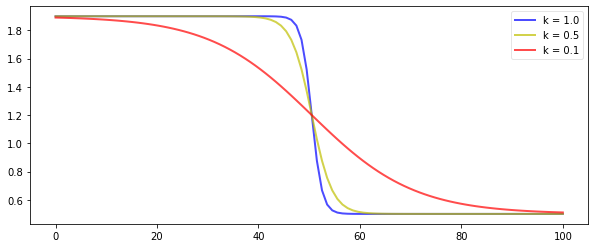

In [40]:
R0start, k, x0, R0end = 1.9, 0.5, 50, 0.5
k1 = 1.0
k2 = 0.5
k3 = 0.1

x = np.linspace(0, 100, 100)

logistica1 = [logistic(i, R0start, R0end, x0, k1) for i in range(len(x))]
logistica2 = [logistic(i, R0start, R0end, x0, k2) for i in range(len(x))]
logistica3 = [logistic(i, R0start, R0end, x0, k3) for i in range(len(x))]

f, ax = plt.subplots(1,1,figsize=(10,4))

ax.plot(x, logistica1, 'b', alpha=0.7, linewidth=2, label='k = 1.0')
ax.plot(x, logistica2, 'y', alpha=0.7, linewidth=2, label='k = 0.5')
ax.plot(x, logistica3, 'r', alpha=0.7, linewidth=2, label='k = 0.1')

ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
plt.show()

Ahora cambiando el cógido que veníamos trabajando para implementar la variación de $R_0$

In [50]:
N = 1000000
D = 4.0 # infections lasts four days
gamma = 1.0 / D
delta = 1.0 / 5.0  # incubation period of three days
R0start, k, x0, R0end = 5.0, 0.5, 50, 0.5

def beta(t):
    return logistic(t, R0start, R0end, x0, k) * gamma

alpha = 0.2 #20% death rate
rho = 1/9 # 9 days from infection until death

S0, E0, I0, R0, D0 = N-1, 1, 0, 0, 0  # initial conditions: one exposed

In [51]:
y0 = S0, E0, I0, R0, D0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta, alpha, rho))
S, E, I, R, D = ret.T
R0_over_time = [logistic(i, R0start, R0end, x0, k) for i in range(len(t))]  # to plot R_0 over time: get function values

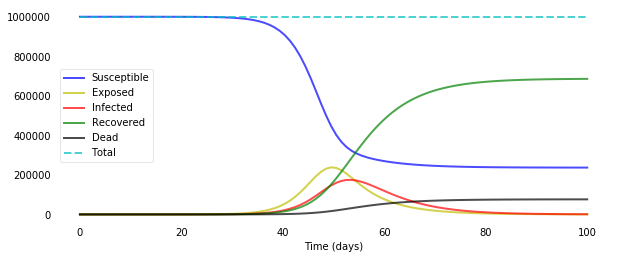

In [52]:
plotseird(t, S, E, I, R, D)

Dejamos que $R_0$ disminuya rápidamente de $5.0$ a $0.5$ alrededor del día $50$ y ahora realmente podemos ver las curvas aplanándose después del día $50$:

# Tasa de fatalidad relacionada con los recursos disponibles y la edad

Al igual que $R_0$, la tasa de mortalidad $\alpha$ probablemente no sea constante para la mayoría de las enfermedades reales. Puede depender de una variedad de cosas; Nos centraremos en la dependencia de los recursos y la edad.

***Dependencia de los recursos:*** La tasa de mortalidad será mayor cuando hay más personas infectadas. Para pensar en una función que tenga ésto en consideración, se necesitaría una tasa de mortalidad "*base*" u "*óptima*" para el caso de que solo unas pocas personas estén infectadas (y por lo tanto reciban un tratamiento óptimo y puedan recuperarse) y algún factor que tenga en cuenta qué proporción de la población está actualmente infectada. Este es un ejemplo de una función que implementa estas ideas:

$$\alpha(t)=s \cdot \frac{I(t)}{N}+\alpha_{opt}$$

Los modelos más elaborados pueden hacer que la tasa de mortalidad dependa de la cantidad de camas de UCI o ventiladores disponibles, etc. Esto se tendrá en cuenta más adelante cuando modelemos Coronavirus.

***Dependencia de la edad:*** La dependencia de la edad es un poco más difícil. Para implementarlo por completo, tendríamos que incluir compartimentos separados para cada grupo de edad (por ejemplo, un compartimento infectado para personas de 0 a 9 años, otro para personas de 10 a 19 años, ...). Eso es factible con un bucle for simple en `Python`, pero las ecuaciones se vuelven un poco confusas. Un enfoque más simple que aún puede producir buenos resultados es el siguiente:

Necesitamos 2 cosas para un enfoque más simple: *tasas de mortalidad por grupo de edad* y *proporción de la población total que se encuentra en ese grupo de edad*. Por ejemplo, podríamos tener las siguientes tasas de mortalidad y número de individuos por grupo de edad (empleando diccionarios de *Python*):



Esta sería una población extremadamente antigua con un $40\%$ en el rango $60-89$ y un $20\%$ en el rango $89+$. Ahora calculamos la tasa de mortalidad promedio general sumando la tasa de mortalidad del grupo de edad multiplicada por la proporción de la población en ese grupo de edad:

$$\alpha = 0.01 \cdot 0.1 + 0.05 \cdot 0.3 + 0.2 \cdot 0.4 + 0.3 \cdot 0.2 = 15.6\%$$

codificándolo

Una población bastante joven con las siguientes proporciones ...

… Solo tendría una tasa de mortalidad promedio de $7.4\%$!

Si queremos usar nuestras fórmulas para la dependencia de los recursos y la edad, podríamos usar la fórmula de los recursos que acabamos de usar para calcular $\alpha_{opt}$ y usar eso en nuestra fórmula dependiente de los recursos de arriba.

con seguridad, hay formas más elaboradas de implementar tasas de mortalidad con el tiempo. Por ejemplo, no estamos teniendo en cuenta que solo los casos críticos que requieren cuidados intensivos llenan los hospitales y pueden aumentar las tasas de mortalidad; o que las muertes cambian la estructura de la población que usamos para calcular la tasa de mortalidad en primer lugar; o que el impacto de los infectados en las tasas de mortalidad debería tener lugar varios días después, ya que las personas no suelen morir de inmediato, lo que resultaría en una [ecuación diferencial con retardo](https://en.wikipedia.org/wiki/Delay_differential_equation).

## Implementación computacional de la tasa de fatalidad relacionada con los recursos disponibles y la edad

La implementación computacional es sencilla, no es necesario siquiera cambiar las ecuaciones principales (definimos *alfa* dentro de las ecuaciones ya que necesitamos acceso al valor actual $I(t)$).

In [66]:
def deriv(y, t, N, beta, gamma, delta, alpha_opt, rho):
    S, E, I, R, D = y
    
    def alpha(t):
        return s * I/N + alpha_opt
    
    dSdt = -beta(t) * S * I / N
    dEdt = beta(t) * S * I / N - delta * E
    dIdt = delta * E - (1 - alpha(t)) * gamma * I - alpha(t) * rho * I
    dRdt = (1 - alpha(t)) * gamma * I
    dDdt = alpha(t) * rho * I
    return dSdt, dEdt, dIdt, dRdt, dDdt

In [78]:
def plotseird(t, S, E, I, R, D=None, L=None, R0=None, Alpha=None):
    f, ax = plt.subplots(1,1,figsize=(10,4))
    ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
    ax.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Exposed')
    ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
    ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
    if D is not None:
        ax.plot(t, D, 'k', alpha=0.7, linewidth=2, label='Dead')
        ax.plot(t, S+E+I+R+D, 'c--', alpha=0.7, linewidth=2, label='Total')
    else:
        ax.plot(t, S+E+I+R, 'c--', alpha=0.7, linewidth=2, label='Total')

    ax.set_xlabel('Time (days)')

    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend(borderpad=2.0)
    legend.get_frame().set_alpha(0.5)
    
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    
    if L is not None:
        plt.title("Lockdown after {} days".format(L))
    plt.show();

    if R0 is not None or CFR is not None:
        f = plt.figure(figsize=(12,4))
  
    if R0 is not None:
        # sp1
        ax1 = f.add_subplot(121)
        ax1.plot(t, R0, 'b--', alpha=0.7, linewidth=2, label='R_0')

        ax1.set_xlabel('Time (days)')
        ax1.title.set_text('R_0 over time')
        # ax.set_ylabel('Number (1000s)')
        # ax.set_ylim(0,1.2)
        ax1.yaxis.set_tick_params(length=0)
        ax1.xaxis.set_tick_params(length=0)
        ax1.grid(b=True, which='major', c='w', lw=2, ls='-')
        legend = ax1.legend()
        legend.get_frame().set_alpha(0.5)
        
        for spine in ('top', 'right', 'bottom', 'left'):
            ax.spines[spine].set_visible(False)

    if Alpha is not None:
        # sp2
        ax2 = f.add_subplot(122)
        ax2.plot(t, Alpha, 'r--', alpha=0.7, linewidth=2, label='alpha')

        ax2.set_xlabel('Time (days)')
        ax2.title.set_text('fatality rate over time')
        # ax.set_ylabel('Number (1000s)')
        # ax.set_ylim(0,1.2)
        ax2.yaxis.set_tick_params(length=0)
        ax2.xaxis.set_tick_params(length=0)
        ax2.grid(b=True, which='major', c='w', lw=2, ls='-')
        legend = ax2.legend()
        legend.get_frame().set_alpha(0.5)
        
        for spine in ('top', 'right', 'bottom', 'left'):
            ax.spines[spine].set_visible(False)

        plt.show();

In [73]:
N = 1000000
D = 4.0 # infections lasts four days
gamma = 1.0 / D
delta = 1.0 / 5.0  # incubation period of three days

R0start, k, x0, R0end = 5.0, 0.5, 50, 0.5

def beta(t):
    return logistic(t, R0start, R0end, x0, k) * gamma

#alpha = 0.2 #20% death rate

alpha_by_agegroup = {"0-29": 0.01, "30-59": 0.05, "60-89": 0.20,
                     "89+": 0.30
                    }

proportion_of_agegroup = {"0-29": 0.1, "30-59": 0.3, "60-89": 0.4,
                          "89+": 0.2
                         }

s = 0.01

alpha_opt = sum(alpha_by_agegroup[i] * proportion_of_agegroup[i] 
            for i in list(alpha_by_agegroup.keys()))

rho = 1/9 # 9 days from infection until death

S0, E0, I0, R0, D0 = N-1, 1, 0, 0, 0  # initial conditions: one exposed

In [74]:
t = np.linspace(0, 100, 100) # Grid of time points (in days)
y0 = S0, E0, I0, R0, D0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta, alpha_opt, rho))

S, E, I, R, D = ret.T

R0_over_time = [logistic(i, R0start, R0end, x0, k) for i in range(len(t))]  # to plot R_0 over time: get function values

Alpha_over_time = [s * I[i]/N + alpha_opt for i in range(len(t))]  # to plot alpha over time

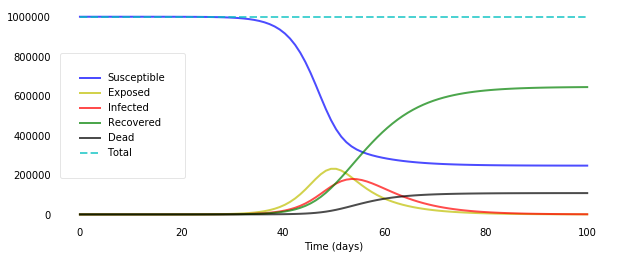

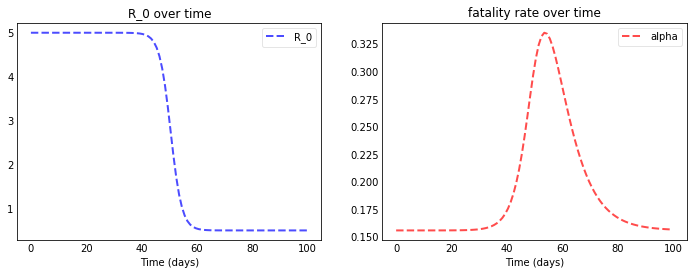

In [79]:
plotseird(t, S, E, I, R, D, R0=R0_over_time, Alpha=Alpha_over_time)

# Aplicación al caso colombiano

***Nota:*** En este apartado se seguirá el trabajo realizado por 

- [Prevendo o crescimento de casos de COVID-19 (coronavírus) no Brasil com análise de dados, gráficos e equações! — Partes 1 e 2](https://medium.com/@caiquecoelho/prevendo-o-crescimento-de-casos-de-covid-19-coronavirus-no-brasil-com-an%C3%A1lise-de-dados-gr%C3%A1ficos-33ee525b62f8): By Caíque Coelho, in Towardsdatascience.com. Mar 19

Una vez obtenido un modelo relativamente mas completo. vamos a revisar los datos del comportamiento de la pandemia en Colombia a la feche del día 18 de abril de 2020.

Empezamos por importar las bibliotecas a emplear

In [130]:
## Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import io
import requests

Vamos a emplear los datos levantados por:

- 2019 Novel Coronavirus COVID-19 (2019-nCoV) [Data Repository](https://github.com/CSSEGISandData/COVID-19) by Johns Hopkins CSSE 


- [World O Meter](https://www.worldometers.info/coronavirus/)

Se trabajará con los datos de casos confirmados y decesos.

Primero se carga la información a nivel global

In [173]:
# Casos confirmados a nivel mundial
url1 = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
confirmedCasesGlobal = pd.read_csv(url1)

# Decesos confirmados a nivel mundial
url2 = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
deathsCasesGlobal = pd.read_csv(url2)

Se extraen los datos de los casos confirmados (positivos) y los decesos en ***Colombia*** al 18/04/2020

In [155]:
confirmedcasesColombia = confirmedCasesGlobal.loc[confirmedCasesGlobal['Country/Region'] == 'Colombia']
confirmedcasesColombia.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20
82,NaN,Colombia,4.5709,-74.2973,0,0,0,0,0,0,...,2054,2223,2473,2709,2776,2852,2979,3105,3233,3439


In [174]:
deathcasesColombia = deathsCasesGlobal.loc[deathsCasesGlobal['Country/Region'] == 'Colombia']
deathcasesColombia.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
82,NaN,Colombia,4.5709,-74.2973,0,0,0,0,0,0,...,69,80,100,109,112,127,131,144,153,153


Las primeras cuatro columnas es información irrelevante para el estudio en cuestión, por lo que se retiran.

In [157]:
confirmedcasesColombia.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1, inplace=True)
confirmedcasesColombia.head()

C:\Users\Lenovo\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20
82,0,0,0,0,0,0,0,0,0,0,...,2054,2223,2473,2709,2776,2852,2979,3105,3233,3439


In [175]:
deathcasesColombia.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1, inplace=True)
deathcasesColombia.head()

C:\Users\Lenovo\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
82,0,0,0,0,0,0,0,0,0,0,...,69,80,100,109,112,127,131,144,153,153


Para generar las gráficas se requiere que los datos estén en columna, por lo que se realiza la transposición de los datos que están dados en fila.

In [163]:
confirmedcasesColombia_transposed = confirmedcasesColombia.T
confirmedcasesColombia_transposed.columns = ['cases']
confirmedcasesColombia_transposed.head()

,cases
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0


In [176]:
deathcasesColombia_transposed = deathcasesColombia.T
deathcasesColombia_transposed.columns = ['cases']
deathcasesColombia_transposed.head()

,cases
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0


Graficando los datos desde el primer día que se cuenta con información

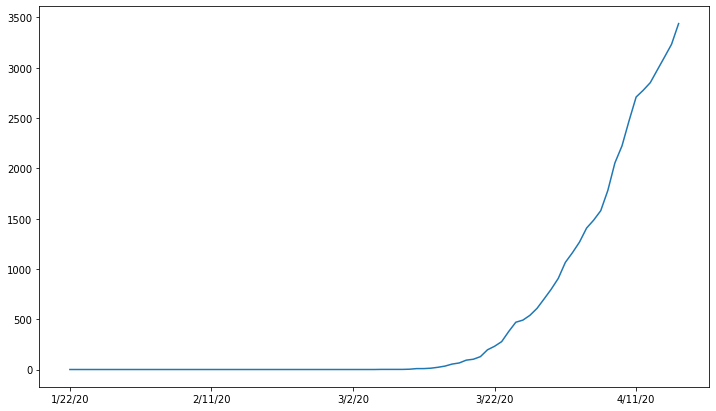

In [171]:
days = confirmedcasesColombia_transposed.index.values
confirmedcasesColombia_transposed['cases'].plot(figsize=(12,7))

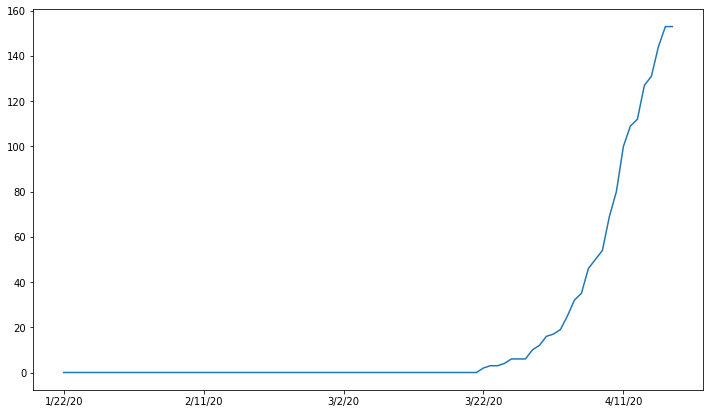

In [177]:
days = deathcasesColombia_transposed.index.values
deathcasesColombia_transposed['cases'].plot(figsize=(12,7))

Nos interesa únicamente a partir de las fechas en donde empezaron a tenerse casos confirmados y decesos

In [167]:
confirmedcasesColombia_transposed_with_cases = confirmedcasesColombia_transposed[confirmedcasesColombia_transposed['cases'] > 0]
confirmedcasesColombia_transposed_with_cases.head(100)

,cases
3/6/20,1
3/7/20,1
3/8/20,1
3/9/20,1
3/10/20,3
3/11/20,9
3/12/20,9
3/13/20,13
3/14/20,22
3/15/20,34


In [169]:
deathcasesColombia_transposed_with_cases = deathcasesColombia_transposed[deathcasesColombia_transposed['cases'] > 0]
deathcasesColombia_transposed_with_cases.head(100)

,cases
3/22/20,2
3/23/20,3
3/24/20,3
3/25/20,4
3/26/20,6
3/27/20,6
3/28/20,6
3/29/20,10
3/30/20,12
3/31/20,16


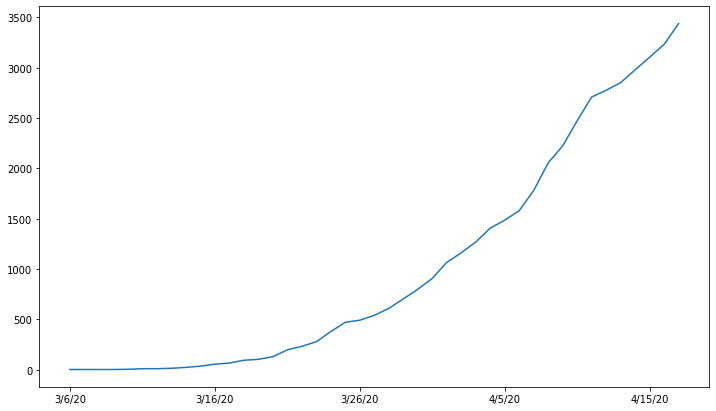

In [168]:
confirmedcasesColombia_transposed_with_cases['cases'].plot(figsize=(12,7))

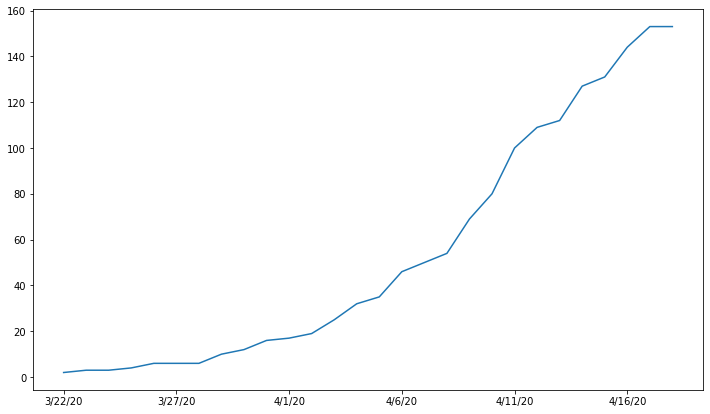

In [170]:
deathcasesColombia_transposed_with_cases['cases'].plot(figsize=(12,7))

In [179]:
len(confirmedcasesColombia_transposed_with_cases)

43

Con esta información, que es tomada en campo, es decir, es la que daremos como "*real*", ya que es la información que ofrecen las autoridades colombianas, se puede eralizar un estudio de tendencia y compararlo con los modelos descritos anteriormente, para determinar qué tan fiables pueden llegar a ser, entendiendo que se deben ajustar los parámetros lo mejor posible para que también sirvan para proyecciones.

Vamos a convertir la información en un arreglo a través de la biblioteca `numpy`

In [181]:
Yc = np.array(confirmedcasesColombia_transposed_with_cases['cases'].values)
Yc

array([   1,    1,    1,    1,    3,    9,    9,   13,   22,   34,   54,
         65,   93,  102,  128,  196,  231,  277,  378,  470,  491,  539,
        608,  702,  798,  906, 1065, 1161, 1267, 1406, 1485, 1579, 1780,
       2054, 2223, 2473, 2709, 2776, 2852, 2979, 3105, 3233, 3439],
      dtype=int64)

In [182]:
Yd = np.array(deathcasesColombia_transposed_with_cases['cases'].values)
Yd

array([  2,   3,   3,   4,   6,   6,   6,  10,  12,  16,  17,  19,  25,
        32,  35,  46,  50,  54,  69,  80, 100, 109, 112, 127, 131, 144,
       153, 153], dtype=int64)

In [ ]:
X_b = []
X_b.append(0)
for index in range(1, len(Y)):
    X_b.append(Yc[index])
X_b = np.array(X_b)

Ya obtumvimos la información de los casos confirmados y los decesos en los 43 días desde hace que se detectó el primer positivo. Ahora resulta interesante, o mejor dicho, importante, comparar el comportamiento de estos casos con otros países para entender el comportamiento que se ha tenido en Colombia y dar elementos para analizar y proponer posibles planes de contingencia sobre la pandemia.